In [2]:
%matplotlib inline
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

/Users/charming/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


(1, 3, 3, 1)


/Users/charming/anaconda3/lib/python3.6/site-packages/tensorflow/python/client/session.py:1702: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


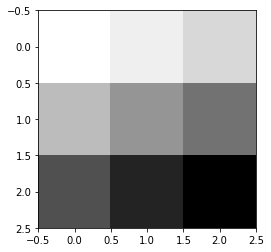

In [18]:
sess = tf.InteractiveSession()
#생성시 자기 자신을 기본 세션으로 설치한다는 것입니다. Tensor.eval()메서드와 Operation.run()메서드는 연산을 실행하기위해 그 세션을 사용할 것입니다.
image = np.array([[[[1],[2],[3]],
                [[4],[5],[6]],
                [[7],[8],[9]]]],dtype=np.float32)
print(image.shape)
plt.imshow(image.reshape(3,3),cmap='Greys')

image.shape: (1, 3, 3, 1)
weight.shape: (2, 2, 1, 1)
conv2d_img.shape: (1, 2, 2, 1)
conv2d_img : [[[[12.]
   [16.]]

  [[24.]
   [28.]]]]
[[12. 16.]
 [24. 28.]]


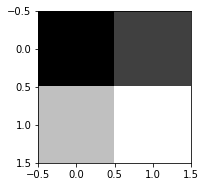

In [36]:
print('image.shape:',image.shape)
weight = tf.constant([[[[1.]],[[1.]]],
                      [[[1.]],[[1.]]]])
print('weight.shape:',weight.shape)
conv2d = tf.nn.conv2d(image,weight,strides=[1,1,1,1],padding='VALID')
conv2d_img = conv2d.eval()
print('conv2d_img.shape:',conv2d_img.shape)
conv2d_img = np.swapaxes(conv2d_img,0,3)
print('conv2d_img :', conv2d_img)
for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(2,2))
    plt.subplot(1,2,i+1), plt.imshow(one_img.reshape(2,2), cmap='gray')

image.shape : (1, 3, 3, 1)
weight.shape : (2, 2, 1, 1)
conv2d_img.shape : (1, 3, 3, 1)
[[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]]


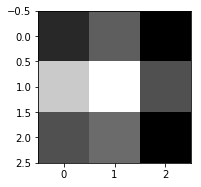

In [56]:
print("image.shape :", image.shape)
weight = tf.constant([[[[1.]],[[1]]],
                      [[[1.]],[[1]]]])
print('weight.shape :',weight.shape)
conv2d = tf.nn.conv2d(image,weight,strides=[1,1,1,1],padding="SAME")
conv2d_img = conv2d.eval()
print('conv2d_img.shape :', conv2d_img.shape)

conv2d_img = np.swapaxes(conv2d_img,0,3)

for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(3,3))
    plt.subplot(1,2,i+1), plt.imshow(one_img.reshape(3,3),cmap="gray")

In [69]:
print('image.shape',image.shape)
weight = tf.constant([[[[1.,2.,3.]],[[1.,2.,3.]]],
                      [[[1.,2.,3.]],[[1.,2.,3.]]]])
print("weight.shape",weight.shape)
conv2d = tf.nn.conv2d(image,weight,strides=[1,1,1,1],padding="SAME")
conv2d_img = conv2d.eval()
print('conv2d_img.shape',conv2d_img.shape)
conv2d_img = np.swapaxes(conv2d_img,0,3)
for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(3,3))
    plt.subplot(1,3,i+1), plt.imshow(one_img.reshape(3,3),cmap="gray")

image.shape (2, 2, 1, 1)
weight.shape (2, 2, 1, 3)
conv2d_img.shape (2, 2, 1, 3)


ValueError: cannot reshape array of size 4 into shape (3,3)

In [66]:
image = np.array([[[[4]],[[3]]],
                   [[[2]],[[1]]]],dtype=np.float32)
pool = tf.nn.max_pool(image, ksize=[1,2,2,1],strides=[1,1,1,1],padding="SAME")
print(pool.shape)
print(pool.eval())
# 가장 큰 값들 뽑은 결과가 4,3,2,1

(2, 2, 1, 1)
[[[[4.]]

  [[3.]]]


 [[[2.]]

  [[1.]]]]


In [68]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/",one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


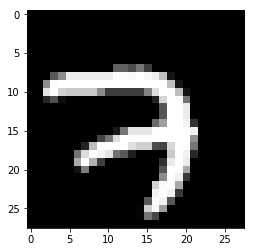

In [74]:
img = mnist.train.images[0].reshape(28,28)
plt.imshow(img,cmap='gray')

/Users/charming/anaconda3/lib/python3.6/site-packages/tensorflow/python/client/session.py:1702: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Tensor("Conv2D_39:0", shape=(1, 14, 14, 5), dtype=float32)
(3, 3, 1, 5)


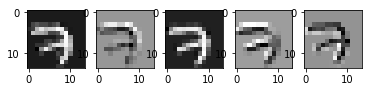

In [90]:
sess = tf.InteractiveSession()

img = img.reshape(-1,28,28,1)
W1 = tf.random_normal([3,3,1,5],stddev=0.01)
conv2d = tf.nn.conv2d(img,W1,strides=[1,2,2,1],padding='SAME')
print(conv2d)
print(W1.shape)

sess.run(tf.global_variables_initializer())
conv2d_img = conv2d.eval()
conv2d_img = np.swapaxes(conv2d_img,0,3)
for i, one_img in enumerate(conv2d_img):
    plt.subplot(1,5,i+1), plt.imshow(one_img.reshape(14,14),cmap='gray')

Tensor("MaxPool_7:0", shape=(1, 7, 7, 5), dtype=float32)


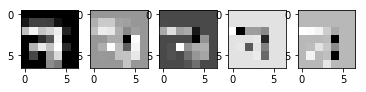

In [95]:
pool = tf.nn.max_pool(conv2d, ksize=[1,2,2,1],strides=[1,2,2,1],padding="SAME")
print(pool)
pool_img = pool.eval()
pool_img = np.swapaxes(pool_img,0,3)
for i, one_img in enumerate(pool_img):
    plt.subplot(1,5,i+1), plt.imshow(one_img.reshape(7,7),cmap='gray')
